In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('FOOD-DATA-GROUP5.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,margarine with yoghurt,88,9.8,1.9,5.6,2.0,0.073,0.0,...,2.8,0.001,0.027,0.3,0.0,2.2,3.5,0.000,0.008,12.971
1,1,1,sunflower seed butter,99,8.8,0.7,6.2,1.6,3.700,1.7,...,10.2,0.300,0.700,49.8,0.3,106.6,92.2,0.075,0.800,27.500
2,2,2,hazelnut oil,120,13.6,1.0,10.6,1.4,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,13.600
3,3,3,menhaden fish oil,1966,218.0,66.3,58.2,74.5,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,218.000
4,4,4,cod liver fish oil,123,13.6,3.1,6.4,3.1,0.000,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,17.700


In [4]:
df.shape

(722, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          722 non-null    int64  
 1   Unnamed: 0            722 non-null    int64  
 2   food                  722 non-null    object 
 3   Caloric Value         722 non-null    int64  
 4   Fat                   722 non-null    float64
 5   Saturated Fats        722 non-null    float64
 6   Monounsaturated Fats  722 non-null    float64
 7   Polyunsaturated Fats  722 non-null    float64
 8   Carbohydrates         722 non-null    float64
 9   Sugars                722 non-null    float64
 10  Protein               722 non-null    float64
 11  Dietary Fiber         722 non-null    float64
 12  Cholesterol           722 non-null    float64
 13  Sodium                722 non-null    float64
 14  Water                 722 non-null    float64
 15  Vitamin A             7

In [6]:
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
count,722.000000,722.000000,722,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
unique,NaN,NaN,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,margarine with yoghurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,360.500000,360.500000,NaN,124.490305,5.592144,1.829550,1.855496,1.696861,15.770335,3.097204,...,37.683823,9.753963,1.015083,20.922909,5.474211,53.199550,200.918144,63.613301,0.370741,74.563083
std,208.567735,208.567735,NaN,218.128817,19.851477,11.135124,5.838940,6.403071,23.106365,7.878036,...,84.010817,34.080257,2.050066,46.268267,15.408958,109.768044,427.455754,181.833341,0.775020,112.994961
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,180.250000,180.250000,NaN,24.250000,0.200000,0.043250,0.039000,0.060250,2.025000,0.000000,...,0.074000,0.032250,0.069250,0.700000,0.042000,0.300000,17.475000,0.018000,0.035000,13.600000
50%,360.500000,360.500000,NaN,68.500000,0.700000,0.100000,0.100000,0.200000,8.150000,0.700000,...,8.150000,0.089000,0.400000,5.850000,0.200000,14.150000,63.000000,0.058000,0.099500,35.300000
75%,540.750000,540.750000,NaN,123.000000,4.375000,0.875000,1.400000,1.000000,19.775000,3.000000,...,35.225000,0.500000,1.100000,23.200000,0.900000,58.150000,191.350000,0.096000,0.400000,83.450000


In [7]:
df.isnull().sum(axis=0)

Unnamed: 0.1            0
Unnamed: 0              0
food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64

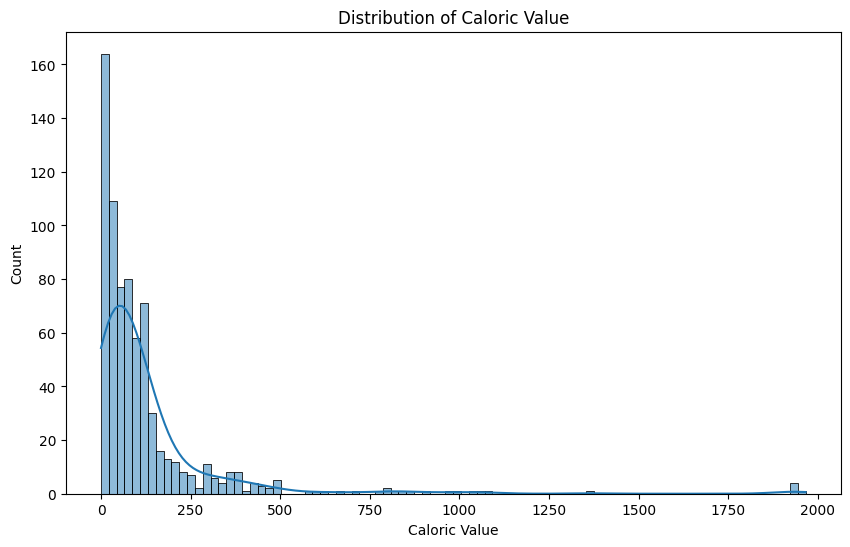

In [8]:
# Distribution of Caloric Value
plt.figure(figsize=(10, 6))
sns.histplot(df['Caloric Value'], kde=True)
plt.title('Distribution of Caloric Value')
plt.show()

  File "/home/user/workspace/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/lib/python3.11/subprocess.py", line 1953, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)


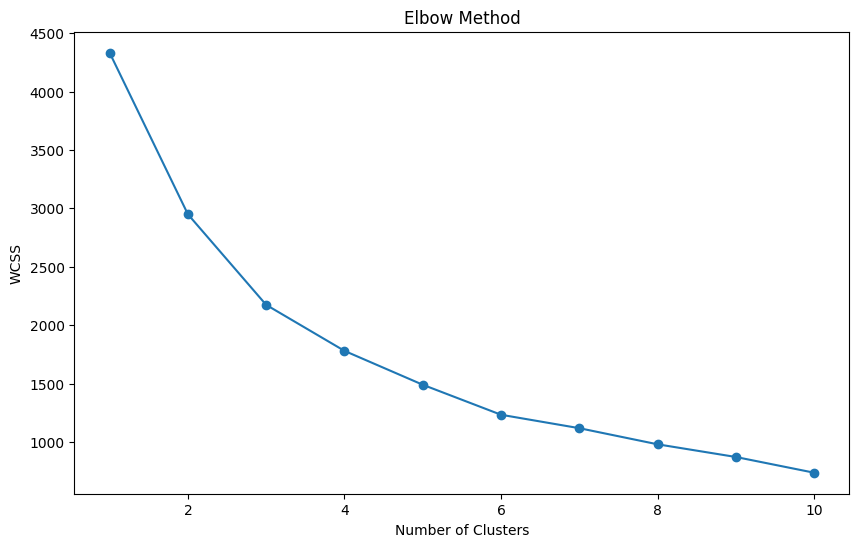

In [9]:
columns = ['Caloric Value', 'Fat', 'Carbohydrates', 'Protein', 'Dietary Fiber', 'Sugars']
X = df[columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

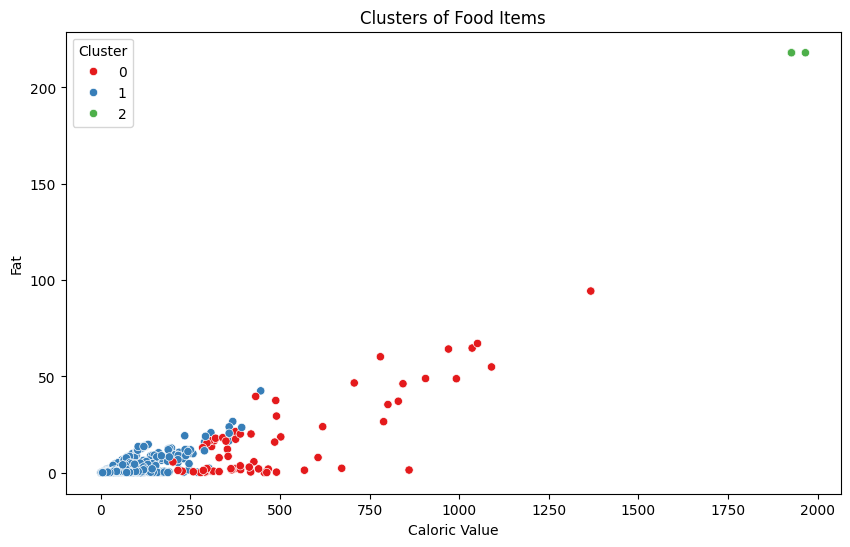

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Caloric Value', y='Fat', hue='Cluster', palette='Set1')
plt.title('Clusters of Food Items')
plt.show()

In [11]:
X = df.drop(columns=['Caloric Value', 'food', 'Cluster'])
y = df['Caloric Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1252.2871662068967
R^2 Score: 0.9525263479455753


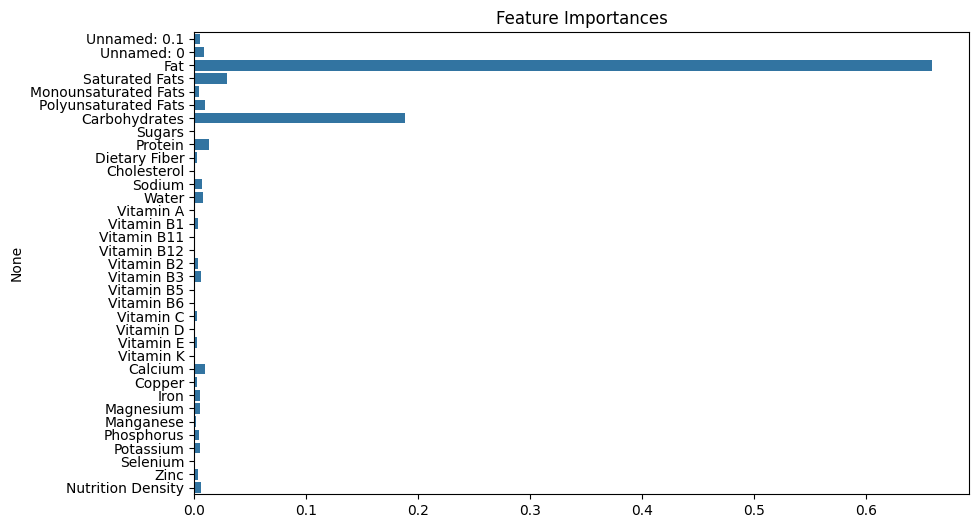

In [12]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()